## Assisted Practice on housing data set

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '../dataset/housing_data_hot_encoded.csv'
df = pd.read_csv(file_path)
df.shape
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [3]:
df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=326)

## Create a line plot to visualise the trend of house price over the years


In [7]:
df['YearBuilt'].describe()


count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [9]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
price_trend = df.groupby('YearBuilt')['SalePrice'].mean().reset_index()
price_trend.head()

,YearBuilt,SalePrice
0,1872,122000.00
1,1875,94000.00
2,1880,200619.75
3,1882,168000.00
4,1885,111250.00


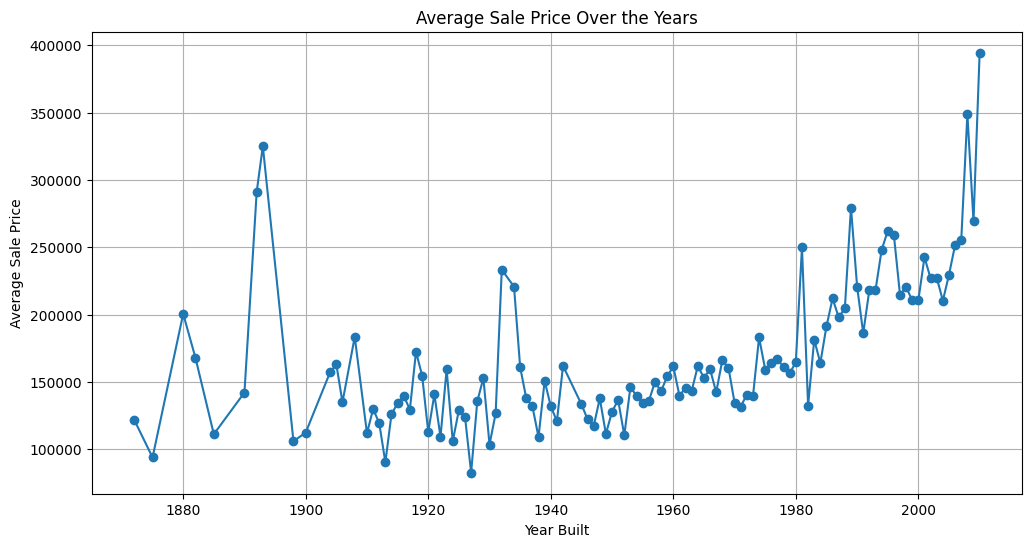

In [11]:
#create a line plot of the average sale price over the years
plt.figure(figsize=(12, 6))
plt.plot(price_trend['YearBuilt'], price_trend['SalePrice'], marker='o')
plt.title('Average Sale Price Over the Years')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price')
plt.grid()
plt.show()


In [16]:
df['YrSold'].describe()


count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

In [17]:
price_trend_sold = df.groupby('YrSold')['SalePrice'].mean().reset_index()
price_trend_sold.head()

,YrSold,SalePrice
0,2006,182549.458599
1,2007,186063.151976
2,2008,177360.838816
3,2009,179432.103550
4,2010,177393.674286


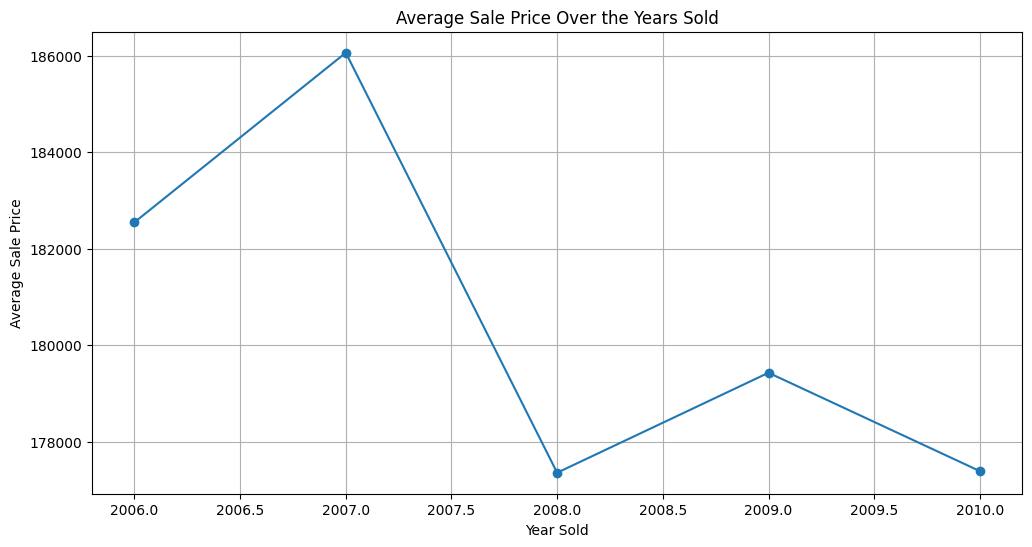

In [18]:
# Plotting the trend of average sale price over the years
plt.figure(figsize=(12, 6))
plt.plot(price_trend_sold['YrSold'], price_trend_sold['SalePrice'], marker='o')
plt.title('Average Sale Price Over the Years Sold')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.grid()
plt.show()


In [20]:
df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

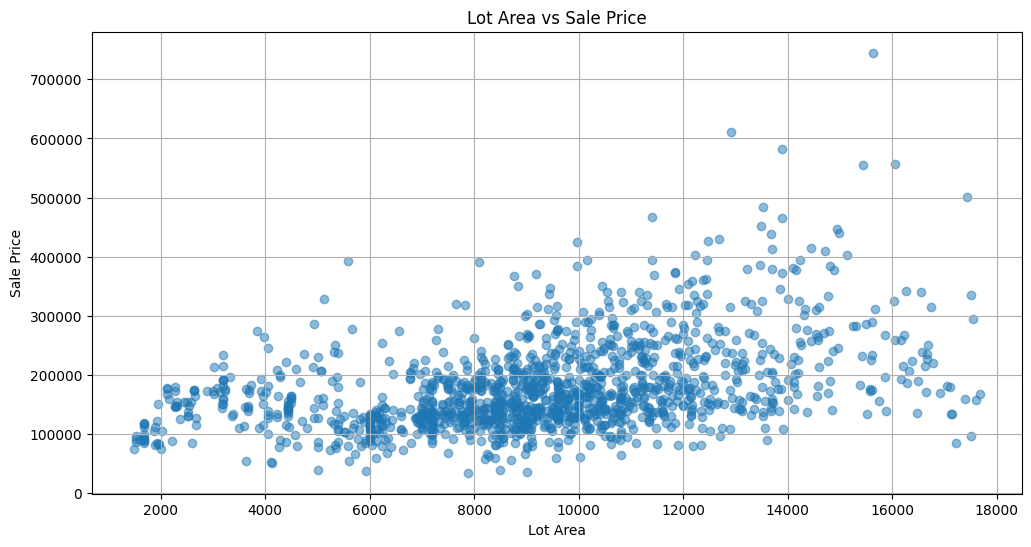

In [22]:
# remove outliers in LotArea
q1 = df['LotArea'].quantile(0.25)
q3 = df['LotArea'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_filtered = df[(df['LotArea'] >= lower_bound) & (df['LotArea'] <= upper_bound)]

# scatter plot for lot area vs sale price
plt.figure(figsize=(12, 6))
plt.scatter(df_filtered['LotArea'], df_filtered['SalePrice'], alpha=0.5)
plt.title('Lot Area vs Sale Price')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.grid()
plt.show()


In [4]:
#find columns with neighborhood data
neighbourhood_columns = df.columns[df.columns.str.contains('Neighborhood')].tolist()

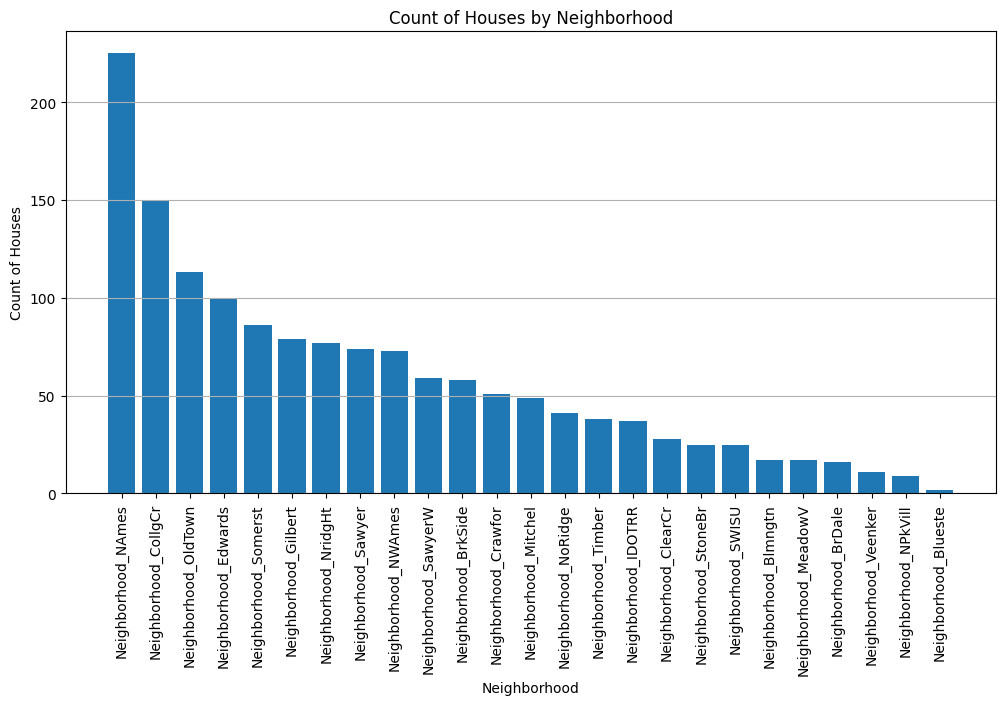

In [ ]:
#create a bar chart for count of houses by neighborhood hot encoded as neighbourhood
neighbourhood_counts = df[neighbourhood_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(neighbourhood_counts.index, neighbourhood_counts.values)
plt.title('Count of Houses by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count of Houses')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()





C:\Users\prate\AppData\Local\Temp\ipykernel_35336\2009092159.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df[neighbourhood] == 1]['SalePrice'] for neighbourhood in neighbourhood_columns], labels=[neighbour.replace("Neighborhood_","") for neighbour in neighbourhood_columns])


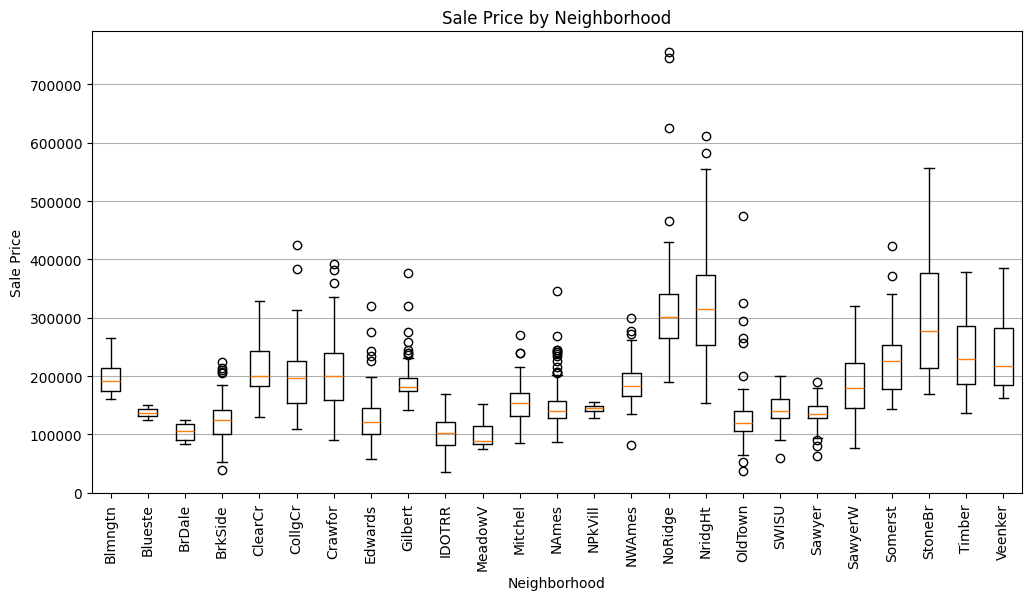

In [37]:
# box chart of slaes price by neighbourhood hot encoded as neighbourhood
plt.figure(figsize=(12, 6))
plt.boxplot([df[df[neighbourhood] == 1]['SalePrice'] for neighbourhood in neighbourhood_columns], labels=[neighbour.replace("Neighborhood_","") for neighbour in neighbourhood_columns])
plt.title('Sale Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()



In [5]:
[neighbour.replace("Neighborhood_","") for neighbour in neighbourhood_columns]

['Blmngtn',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker']

C:\Users\prate\AppData\Local\Temp\ipykernel_32428\2734105610.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([neighbour.replace("Neighborhood_","") for neighbour in neighbourhood_counts.index], rotation=90)


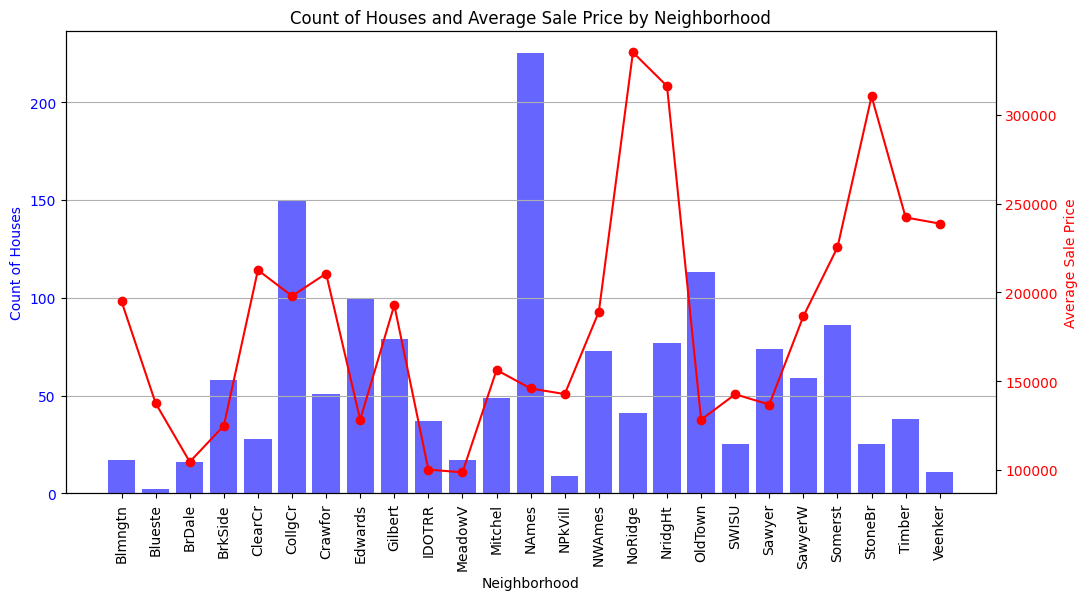

In [6]:
#create a bar chart for count of houses by neighborhood hot encoded as neighbourhood
fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()
neighbourhood_columns.sort()
# Calculate neighborhood counts
neighbourhood_counts = df[neighbourhood_columns].sum()

# Bar chart for count of houses
ax.bar(neighbourhood_counts.index, neighbourhood_counts.values, color='b', alpha=0.6)
ax.set_ylabel('Count of Houses', color='b')
ax.tick_params(axis='y', labelcolor='b')

# Calculate average sale price by neighborhood
neighbourhood_price = df[neighbourhood_columns].mul(df['SalePrice'], axis=0).sum() / neighbourhood_counts

# Line plot for average sale price
ax2.plot(neighbourhood_counts.index, neighbourhood_price.values, color='r', marker='o')
ax2.set_ylabel('Average Sale Price', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title and labels
plt.title('Count of Houses and Average Sale Price by Neighborhood')
ax.set_xlabel('Neighborhood')
ax.set_xticklabels([neighbour.replace("Neighborhood_","") for neighbour in neighbourhood_counts.index], rotation=90)
ax.grid(axis='y')
plt.show()




- create a pie chart on MSzoning column

['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM']


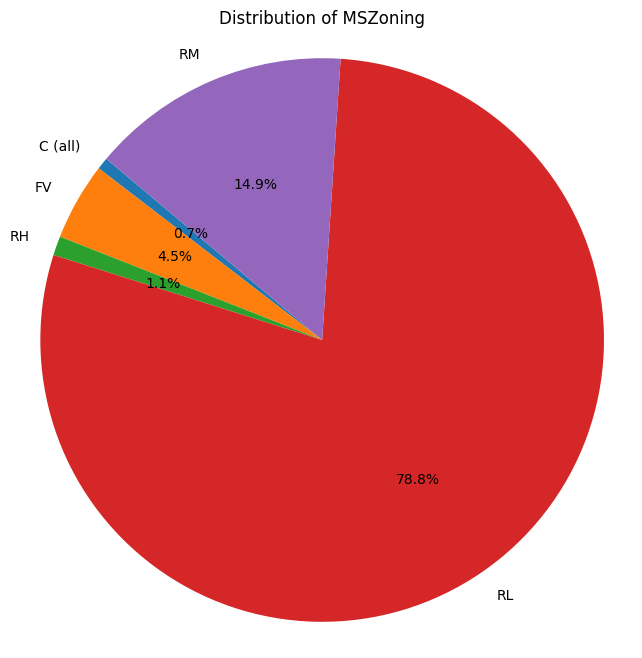

In [9]:
# pie chart of mszoning distribution
print([col for col in df.columns if 'oning' in col])
# ms zoning is a hot encoded column
mszoning_columns = df.columns[df.columns.str.contains('MSZoning')].tolist()
# Calculate counts for each MSZoning category
mszoning_counts = df[mszoning_columns].sum()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(mszoning_counts, labels=[zone.replace("MSZoning_","") for zone in mszoning_counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of MSZoning')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



- 3d scatter plot for lot size , overall quality,sales price

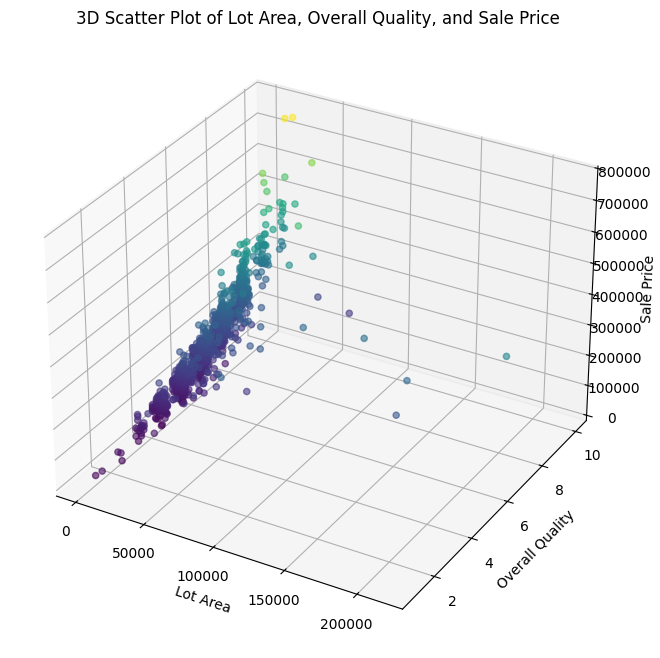

In [11]:
#3d scatter plot with heatmap for lot size , overall quality,sales price
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['LotArea'], df['OverallQual'], df['SalePrice'], c=df['SalePrice'], cmap='viridis', alpha=0.6)
ax.set_xlabel('Lot Area')
ax.set_ylabel('Overall Quality')
ax.set_zlabel('Sale Price')
plt.title('3D Scatter Plot of Lot Area, Overall Quality, and Sale Price')
plt.show()


7. **Stretch Goal**: Create a heatmap of the top 20 features correlated with __SalePrice__

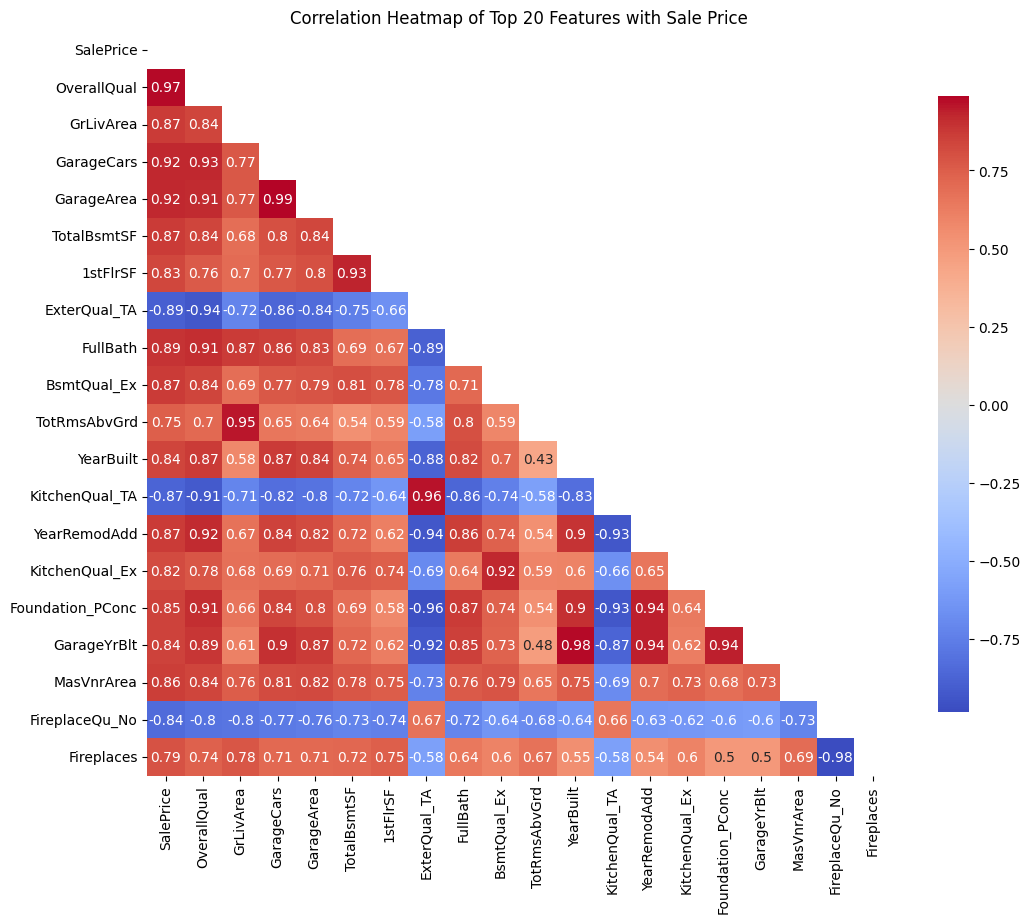

In [18]:
# HEATMAP  for correlation matrix OF of top 20 most correlated VARIABLES WITH SALE PRICE
import seaborn as sns
import numpy as np
corr = df.corr()
top_20_corr = corr['SalePrice'].abs().sort_values(ascending=False).head(20).index
# only top triangle of the heatmap
mask = np.triu(np.ones_like(corr[top_20_corr].corr(), dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr[top_20_corr].corr(), annot=True, mask=mask, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Top 20 Features with Sale Price')
plt.show()



In [ ]:
columns = df.columns[df.columns.str.contains('_')].tolist()
columns = ["_".split(col) for col in columns if col]]

['MSSubClass_SC120',
 'MSSubClass_SC160',
 'MSSubClass_SC180',
 'MSSubClass_SC190',
 'MSSubClass_SC20',
 'MSSubClass_SC30',
 'MSSubClass_SC40',
 'MSSubClass_SC45',
 'MSSubClass_SC50',
 'MSSubClass_SC60',
 'MSSubClass_SC70',
 'MSSubClass_SC75',
 'MSSubClass_SC80',
 'MSSubClass_SC85',
 'MSSubClass_SC90',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neig